In [1]:
# https://docs.scipy.org/doc/scipy/tutorial/fft.html

import numpy as np
import scipy
from IPython.display import Audio
import matplotlib.pyplot as plt

In [2]:
SAMPLE_RATE = 44100
TIME = 1
N = TIME * SAMPLE_RATE
T = 1 / SAMPLE_RATE
def sine(freq: float, amplitude: float, attack = 0, length = TIME):
    t = np.linspace(0, length, length*SAMPLE_RATE)
    wave = amplitude * np.sin(2 * freq * np.pi * t)
    if attack != 0:
        samples_attack = np.floor(SAMPLE_RATE * attack)
        for i in range(int(samples_attack)):
            wave[i] *= (i / samples_attack)
    return wave

def saw(freq: float, amplitude: float, attack = 0, length = TIME):
    t = np.linspace(0, length, length*SAMPLE_RATE)
    wave = amplitude * freq * np.fmod(t, 1 / freq)
    if attack != 0:
        samples_attack = np.floor(SAMPLE_RATE * attack)
        for i in range(int(samples_attack)):
            wave[i] *= (i / samples_attack)
    return wave

def fft(wave):
    yf = scipy.fft.fft(wave)
    xf = scipy.fft.fftfreq(N, T)[:N//2]
    return yf, xf

def plot_wave_precomputed(wave_fft, orig_len, min_freq, y_lim):
    yf = wave_fft
    xf = scipy.fft.fftfreq(orig_len, T)[:N//2]
    plt.plot(xf, 2.0 / N * np.abs(yf[0:N//2]))
    plt.xlim(min_freq)
    plt.xscale("log")
    if y_lim is not None:
        plt.ylim(0,y_lim)
    plt.show()
    
def plot_wave_fft(wave_fft, min_freq, y_lim):
    (yf, xf) = wave_fft
    plt.plot(xf, 2.0 / N * np.abs(yf[0:N//2]))
    plt.xlim(min_freq)
    plt.xscale("log")
    if y_lim is not None:
        plt.ylim(0,y_lim)
    plt.show()

def get_audio(arr, rate = SAMPLE_RATE):
    return Audio(arr, rate = rate)

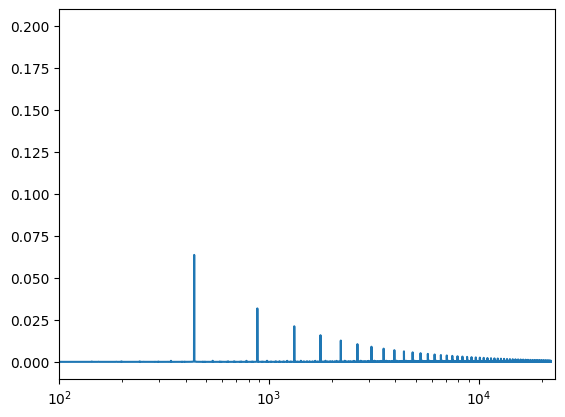

In [3]:
saw_wave = saw(440, 1/5) # + saw(550, 1/5) + saw(660, 1/5)
plot_wave_fft(fft(saw_wave), 100, None)
get_audio(saw_wave)

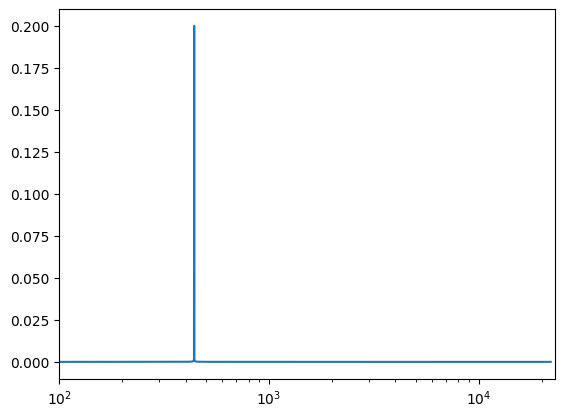

In [4]:
sine_wave = sine(440, 1/5) # + sine(550, 1/5) + sine(660, 1/5)
plot_wave_fft(fft(sine_wave), 100, None)
get_audio(sine_wave)

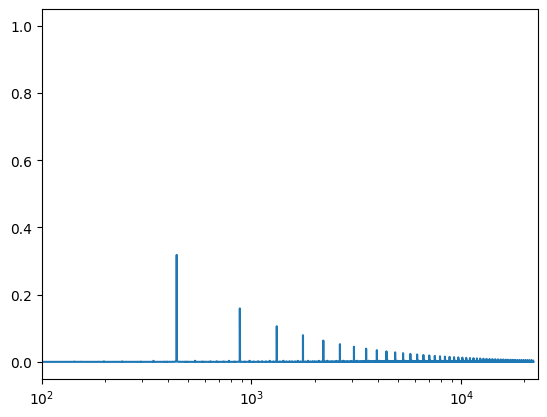

In [5]:
single_saw_wave = saw(440, 1)
plot_wave_fft(fft(single_saw_wave), 100, None)
#get_audio(single_saw_wave)

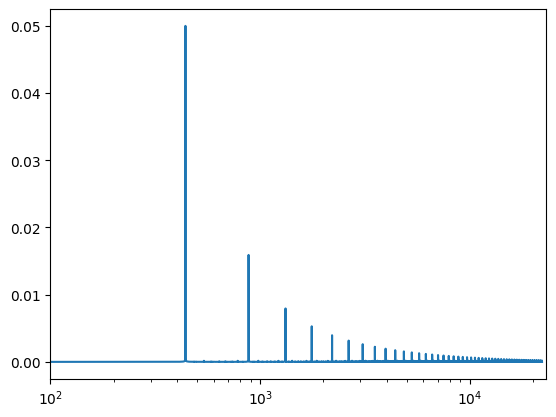

In [6]:
sine_fft, _ = fft(sine_wave)
saw_fft, _ = fft(saw_wave)
single_saw_fft, _ = fft(single_saw_wave)
convolved_signal_fft = scipy.signal.convolve(sine_fft, single_saw_fft)
convolved_signal_fft /= len(convolved_signal_fft)
plot_wave_precomputed(convolved_signal_fft, 44100, 100, None)
get_audio(np.abs(scipy.fft.ifft(convolved_signal_fft)), rate=len(sine_wave)+len(saw_wave)-1)

C:\Users\TPNml\miniconda3\envs\mus2vid-4\lib\site-packages\scipy\signal\_signaltools.py:2265: RuntimeWarning: Use of fft convolution on input with NAN or inf results in NAN or inf output. Consider using method='direct' instead.
  rem = num - convolve(den, quot, mode='full')


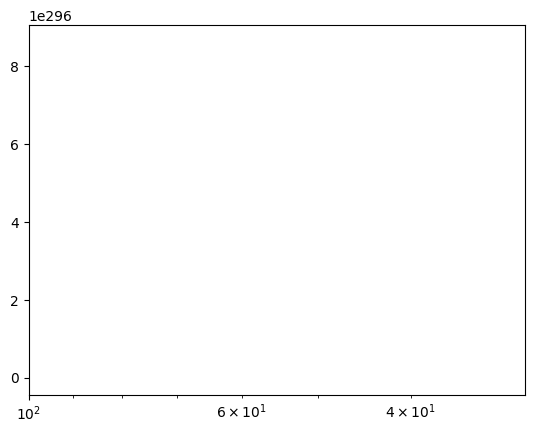

C:\Users\TPNml\miniconda3\envs\mus2vid-4\lib\site-packages\IPython\lib\display.py:188: RuntimeWarning: invalid value encountered in cast
  return scaled.astype("<h").tobytes(), nchan


In [7]:
original = scipy.signal.deconvolve(convolved_signal_fft, sine_fft)
plot_wave_precomputed(original[0], 44100, 100, None)
get_audio(np.abs(scipy.fft.ifft(original[0])))